In [1]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from scipy.integrate import odeint, solve_ivp
from scipy.optimize import minimize
from scipy.stats import linregress, spearmanr, norm

from gLV_fit_lambda import *

# Start by importing full dataset

In [2]:
dataset = "Inulin"
df = pd.read_csv(f"Data/{dataset}_full_passage.csv")
print(df.shape)
df.head()

(473, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC_passage1.0,0.0,0.002365,0.000840,0.000829,0.001313,0.000970,0.000679,0.000812,0.000646,0.001287,0.000257
1,COMM10<AC_passage1.0,24.0,0.011591,0.553315,0.075293,0.325136,0.060694,0.790717,0.021521,0.014780,0.015808,0.055311
2,COMM10<AC_passage2.0,0.0,0.000580,0.027666,0.003765,0.016257,0.003035,0.039536,0.001076,0.000739,0.000790,0.002766
3,COMM10<AC_passage2.0,24.0,0.002481,0.096672,0.139392,0.636775,0.032067,0.770841,0.122771,0.001803,0.004748,0.120618
4,COMM10<AC_passage3.0,0.0,0.000124,0.004834,0.006970,0.031839,0.001603,0.038542,0.006139,0.000090,0.000237,0.006031


# Initialize model parameters (all zeros except self-interaction terms=-1)

In [3]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1

Model has 110 parameters


# Run optimization to find regularized parameters

In [4]:
# instantiate gLV fit 
gLV_model = ODE(df, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model.fit()
print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|███████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 222.42it/s]


Iteration: 0, Loss: 8.955e+02, Convergence rate: inf
Iteration: 1, Loss: 8.828e+02, Convergence rate: 1.420e-02
Iteration: 2, Loss: 8.702e+02, Convergence rate: 1.421e-02
Iteration: 3, Loss: 8.579e+02, Convergence rate: 1.420e-02
Iteration: 4, Loss: 8.457e+02, Convergence rate: 1.420e-02
Iteration: 5, Loss: 8.337e+02, Convergence rate: 1.417e-02
Iteration: 6, Loss: 8.219e+02, Convergence rate: 1.417e-02
Iteration: 7, Loss: 8.103e+02, Convergence rate: 1.414e-02
Iteration: 8, Loss: 7.988e+02, Convergence rate: 1.411e-02
Iteration: 9, Loss: 7.876e+02, Convergence rate: 1.409e-02
Iteration: 10, Loss: 7.765e+02, Convergence rate: 1.405e-02
Iteration: 11, Loss: 7.656e+02, Convergence rate: 1.402e-02
Iteration: 12, Loss: 7.549e+02, Convergence rate: 1.398e-02
Iteration: 13, Loss: 7.444e+02, Convergence rate: 1.394e-02
Iteration: 14, Loss: 7.341e+02, Convergence rate: 1.390e-02
Iteration: 15, Loss: 7.239e+02, Convergence rate: 1.385e-02
Iteration: 16, Loss: 7.139e+02, Convergence rate: 1.381e

 10%|███████▋                                                                        | 11/115 [00:00<00:00, 107.48it/s]

Iteration: 98, Loss: 2.456e+02, Convergence rate: 9.760e-03
Step size set to 4.000e-02
Evidence 23845.838
Updating precision...


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [00:01<00:00, 58.08it/s]


Total samples: 1791, Updated regularization: 1.16e-01
Iteration: 0, Loss: 7.666e+02, Convergence rate: inf
Iteration: 1, Loss: 7.631e+02, Convergence rate: 4.562e-03
Step size set to 2.000e-02


 10%|████████▎                                                                       | 12/115 [00:00<00:00, 117.32it/s]

Iteration: 2, Loss: 7.564e+02, Convergence rate: 8.796e-03
Step size set to 4.000e-02
Evidence 33446.086
Updating precision...


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [00:02<00:00, 56.86it/s]


Total samples: 1791, Updated regularization: 1.79e-01
Iteration: 0, Loss: 8.817e+02, Convergence rate: inf
Iteration: 1, Loss: 8.781e+02, Convergence rate: 4.141e-03
Step size set to 2.000e-02


 10%|███████▋                                                                        | 11/115 [00:00<00:00, 109.70it/s]

Iteration: 2, Loss: 8.710e+02, Convergence rate: 8.015e-03
Step size set to 4.000e-02
Evidence 34582.783
Updating precision...


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [00:02<00:00, 47.43it/s]


Total samples: 1791, Updated regularization: 1.89e-01
Iteration: 0, Loss: 8.935e+02, Convergence rate: inf
Iteration: 1, Loss: 8.900e+02, Convergence rate: 3.947e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 8.832e+02, Convergence rate: 7.666e-03
Step size set to 4.000e-02
Evidence 34778.676
Elapsed: 100.568


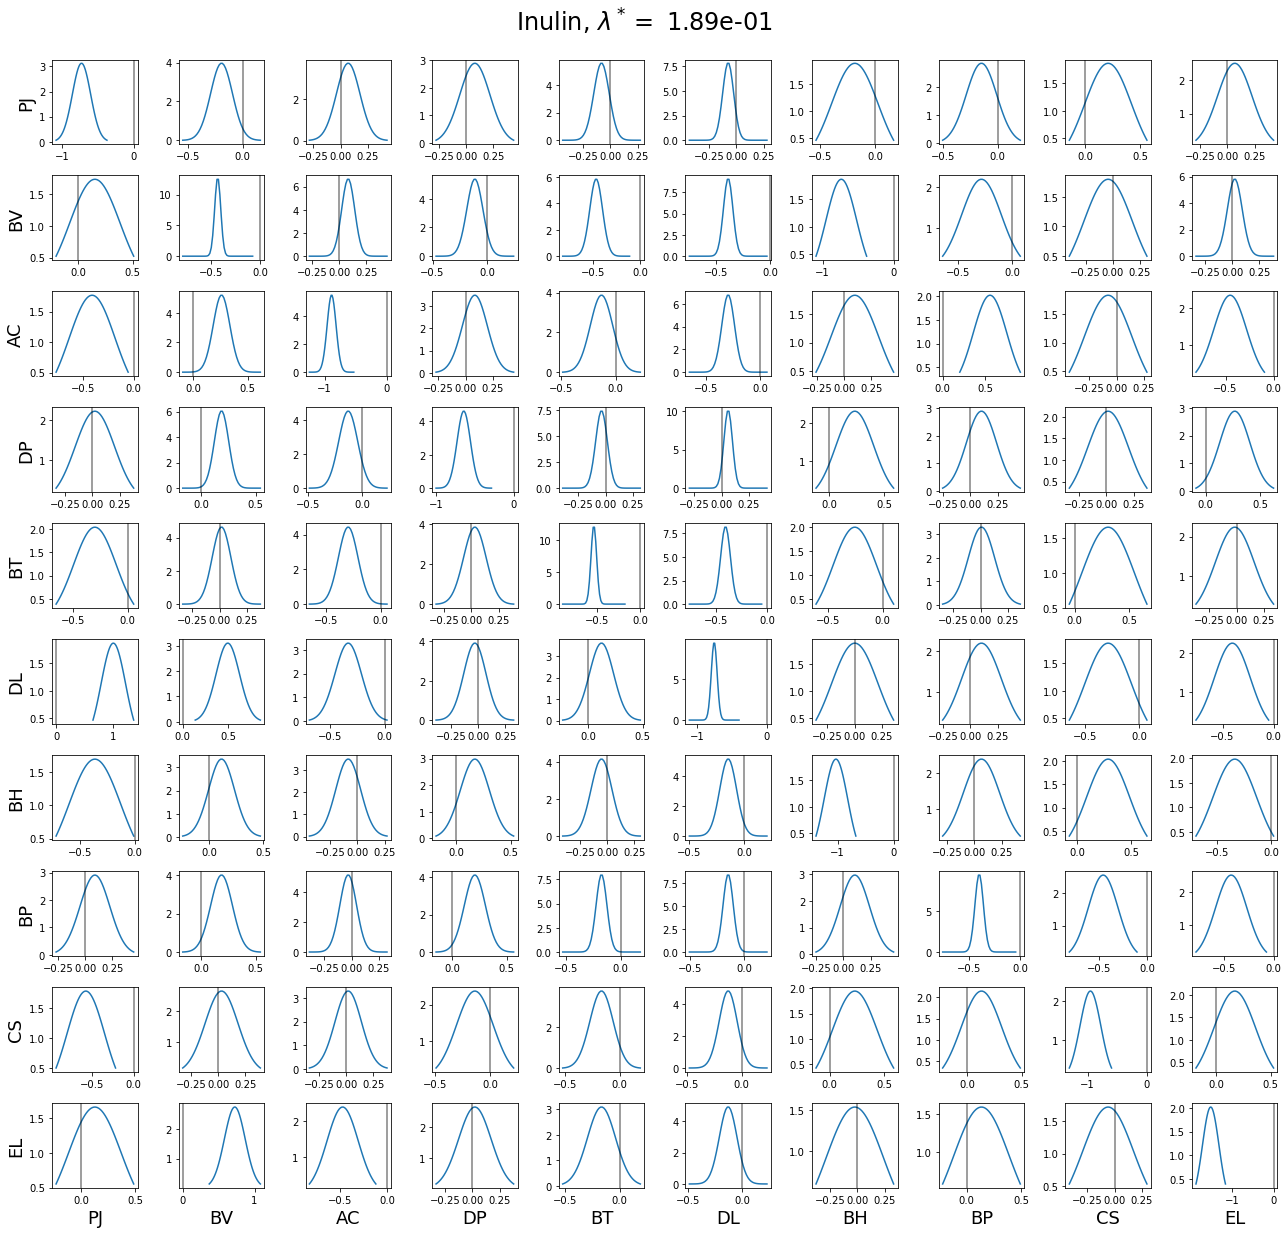

In [5]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']
Avec = gLV_model.params[gLV_model.n_species:]
Aij_std = np.sqrt(np.diag(gLV_model.Ainv))[gLV_model.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model.n_species):
    for j in range(gLV_model.n_species):
        plt.subplot(gLV_model.n_species, gLV_model.n_species, k+1)
        a = np.linspace(Avec[k]-np.std(Avec), Avec[k]+np.std(Avec))
        plt.plot(a, norm.pdf(a,Avec[k],Aij_std[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset.replace("_"," "), gLV_model.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [6]:
print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model.params))))

Maximum absolute parameter value: 1.519


In [7]:
log_eigs = np.log(np.linalg.eigvalsh(gLV_model.A))
U = np.sum(log_eigs)
print("Parameter precision: {:.3f}".format(U))

Parameter precision: 541.987


In [8]:
# Compute Wald test for each parameter
std_errors = np.sqrt(np.diag(gLV_model.Ainv))
walds = gLV_model.params/std_errors
wald_p_vals = 2*norm.cdf(-np.abs(walds))

In [9]:
sum(wald_p_vals<.05)/len(wald_p_vals)

0.38181818181818183

In [10]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df = pd.DataFrame()
df["Param name"] = param_names
df["Param value"] = gLV_model.params
df["Param stdv"]  = np.sqrt(np.diag(gLV_model.Ainv))
df["Param p-value"] = wald_p_vals
for j, param_name in enumerate(param_names):
    df[param_name]  = gLV_model.Ainv[:, j]
#df.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df.head(20)

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.253887,0.033606,4.197022e-14,0.001129,-0.000019,0.000044,-7.180801e-06,0.000021,-7.164311e-05,...,-0.000235,-0.000002,-0.000053,-0.000026,-0.000024,0.000075,-5.608087e-05,1.920710e-06,-0.000005,-0.000021
1,BV,0.482203,0.021134,3.177754e-115,-0.000019,0.000447,-0.000019,-8.504477e-06,0.000053,-2.200351e-05,...,0.000034,-0.000127,-0.000025,0.000075,-0.000007,-0.000055,3.867167e-05,8.281115e-06,0.000006,0.000216
2,AC,0.437547,0.027526,6.798845e-57,0.000044,-0.000019,0.000758,4.260721e-06,0.000068,1.525698e-04,...,0.000036,0.000116,-0.000217,0.000114,-0.000060,-0.000013,-6.687591e-05,-1.116920e-05,-0.000014,-0.000296
3,DP,0.190893,0.019602,2.068502e-22,-0.000007,-0.000009,0.000004,3.842432e-04,0.000006,-1.897939e-06,...,0.000014,-0.000013,0.000058,0.000034,0.000030,0.000051,1.938057e-05,-7.289524e-07,-0.000008,0.000064
4,BT,0.466031,0.022661,5.629854e-94,0.000021,0.000053,0.000068,5.999707e-06,0.000514,2.962057e-05,...,0.000017,0.000057,-0.000033,-0.000012,0.000099,0.000011,-1.623420e-05,1.093232e-06,-0.000005,-0.000090
5,DL,0.521927,0.021137,1.267480e-134,-0.000072,-0.000022,0.000153,-1.897939e-06,0.000030,4.467523e-04,...,-0.000018,0.000043,-0.000119,0.000156,-0.000101,-0.000109,-9.683313e-07,-6.061007e-06,-0.000085,-0.000247
6,BH,0.275541,0.044615,6.575643e-10,0.000124,0.000081,-0.000007,-3.825419e-05,0.000023,-1.703067e-05,...,-0.000012,0.000234,0.000084,-0.000093,-0.000083,-0.000117,1.873407e-04,1.199369e-04,0.000125,-0.000279
7,BP,0.282564,0.021447,1.218032e-39,0.000001,0.000001,-0.000017,-8.602941e-06,0.000003,-1.432354e-07,...,-0.000030,0.000033,0.000003,-0.000038,-0.000051,-0.000027,2.001368e-05,4.045450e-05,0.000015,-0.000094
8,CS,0.271283,0.040821,3.019027e-11,0.000088,0.000005,0.000021,1.014494e-05,-0.000014,3.241790e-05,...,-0.000048,-0.000055,-0.000040,-0.000010,0.000027,0.000073,3.965913e-05,-2.286868e-05,0.000051,0.000145
9,EL,0.321836,0.039100,1.854315e-16,-0.000005,-0.000045,0.000089,-4.181104e-05,0.000020,8.142930e-05,...,-0.000836,0.001727,-0.001503,0.000793,-0.001360,-0.001553,-6.418344e-04,-1.162497e-03,-0.001187,-0.004943


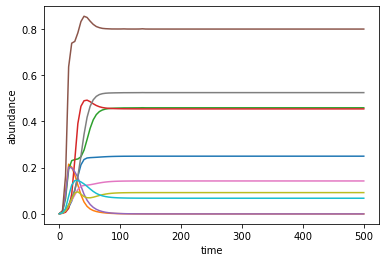

All real(eigenvalues) negative, system is stable


In [11]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model.n_species)
y = runODE(t_eval, x0, gLV_model.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model.params[:gLV_model.n_species]
A = np.reshape(gLV_model.params[gLV_model.n_species:], [gLV_model.n_species, gLV_model.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")